In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_excel('Completions_DataSet.xlsx')

### 1. Import the Completions Data Set from the provided ‘Completions_DataSet.xlsx’ file and
### perform the following (6 points):
### a. Apply standard scaling on the data using the sklearn library.
### b. Apply the PCA algorithm using the sklearn library with n_components=3.
### c. Plot a heat map of new vs. old features.
### d. Write the data based on the new features into a csv file: 'Three Principal Components.csv'.

In [3]:
df.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,173.4,45.5,1117.2,10.0
1,166.6,39.0,1117.2,10.0
2,159.8,41.6,1037.4,10.0
3,156.4,40.3,1197.0,10.0
4,170.0,46.8,1117.2,10.0


In [4]:
#a. Apply standard scaling on the data using the sklearn library.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [5]:
scaled_features= scaler.transform(df)

In [6]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

In [7]:
scaled_features=pd.DataFrame(scaled_features, columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])

In [8]:
scaled_features.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053


In [9]:
#b. Apply the PCA algorithm using the sklearn library with n_components=3.

from sklearn.decomposition import PCA
PCA= PCA(n_components=3)
PCA.fit(scaled_features)
Transformed_PCA=PCA.transform(scaled_features)
Transformed_PCA

array([[-2.20401503,  0.49230415, -0.11615207],
       [-2.01847823, -0.65257072, -0.23789563],
       [-2.3001967 , -0.3263588 ,  0.04335486],
       [-2.23481144, -0.5804819 ,  0.08681612],
       [-2.32844843,  0.65610591,  0.02853254],
       [-2.01570154,  1.4935046 ,  0.05422406],
       [-2.37840516,  0.05716489,  0.33936909],
       [-2.17148144,  0.23678942, -0.08080953],
       [-2.26829929, -1.09568622,  0.13314502],
       [-2.12311515, -0.44880128, -0.25552702],
       [-2.10815144,  1.05406075, -0.24843519],
       [-2.26338126,  0.14507647,  0.09921761],
       [-2.15628491, -0.70709925, -0.23642193],
       [-2.56671864, -0.94403556,  0.16899296],
       [-2.14337646,  1.8671572 , -0.440417  ],
       [-2.20456595,  2.68214851,  0.07377597],
       [-2.14710823,  1.48793811,  0.02174918],
       [-2.12858409,  0.50028039, -0.03167156],
       [-1.84194759,  1.41483116, -0.34684947],
       [-2.2819054 ,  1.13273419,  0.15263835],
       [-1.85627512,  0.42578182, -0.408

In [10]:
print(scaled_features.shape) 
print(Transformed_PCA.shape)

(144, 4)
(144, 3)


In [11]:
PCA.components_

array([[ 0.51942738, -0.27127608,  0.58031336,  0.56554477],
       [ 0.38765923,  0.91953234,  0.02458254,  0.05980205],
       [-0.71577455,  0.25673144,  0.14341439,  0.63339409]])

In [12]:
df_components = pd.DataFrame(PCA.components_,columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])
df_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802
2,-0.715775,0.256731,0.143414,0.633394


<AxesSubplot:>

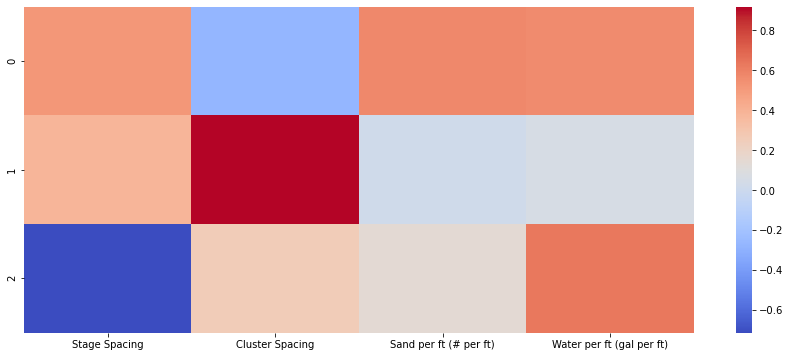

In [13]:
#c. Plot a heat map of new vs. old features.

plt.figure(figsize=(15,6))
sns.heatmap(df_components,cmap='coolwarm')

In [14]:
#d. Write the data based on the new features into a csv file: 'Three Principal Components.csv'.

transformed_PCA= pd.DataFrame(Transformed_PCA, columns=['First Principal Component', 'Second Principal Component',"Third Principal Component"])
transformed_PCA.to_csv('Three Principal Components.csv')

### 2. Import the Completions Data Set from the provided ‘Completions_DataSet.xlsx’ file and
### perform the following (4 points):
### a. Apply normal scaling in range [0,1] on the data using the sklearn library.
### b. Apply the NMF algorithm using the sklearn library with n_components=3.
### c. Plot a heat map of new vs. old features.

In [15]:
#a. Apply normal scaling in range [0,1] on the data using the sklearn library.

from sklearn import preprocessing
scaler2= preprocessing.MinMaxScaler(feature_range=(0,1))
scaler2.fit(df)
df_scaled2 = scaler2.transform(df)
print(df_scaled2)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [16]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

In [17]:
df_scaled2 = pd.DataFrame(df_scaled2, columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])

In [18]:
df_scaled2

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
139,0.722222,0.458333,0.745763,0.833333
140,0.666667,0.458333,0.779661,0.958333
141,0.722222,0.458333,0.694915,0.916667
142,0.416667,0.291667,0.694915,0.750000


In [19]:
# b. Apply the NMF algorithm using the sklearn library with n_components=3.

from sklearn.decomposition import NMF
nmf = NMF(n_components=3, init=None, solver='cd',beta_loss='frobenius',random_state=100,max_iter=10000)
nmf_transformed=nmf.fit_transform(df_scaled2)


In [20]:
nmf.components_

array([[0.        , 0.        , 1.62788437, 2.33299209],
       [0.33733979, 2.51191393, 0.        , 0.10462379],
       [2.36154188, 0.00254833, 1.00273909, 0.        ]])

In [21]:
df_scaled_components = pd.DataFrame(np.round(nmf.components_,4), columns=df_scaled2.columns)
df_scaled_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.0000,0.0000,1.6279,2.3330
1,0.3373,2.5119,0.0000,0.1046
2,2.3615,0.0025,1.0027,0.0000


<AxesSubplot:>

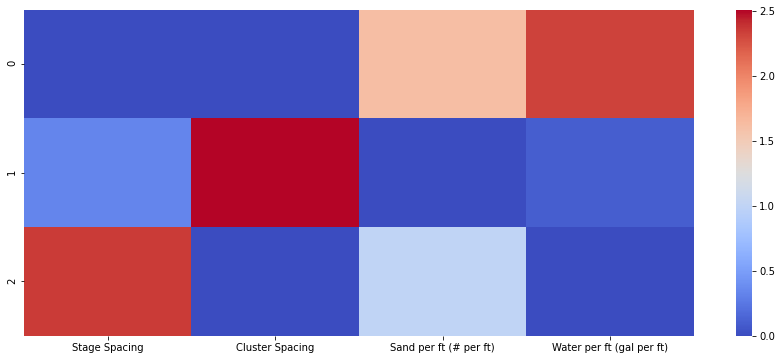

In [22]:
# c. Plot a heat map of new vs. old features.

plt.figure(figsize=(15,6))
sns.heatmap(df_scaled_components,cmap='coolwarm')